In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import KeyFunctions as me

import matplotlib as mlp

import warnings
warnings.filterwarnings("ignore")

mlp.rcParams['font.family'] = 'Nimbus Roman'
mlp.rcParams['figure.dpi']= 300
mlp.rcParams['axes.linewidth'] = 1.5
mlp.rcParams['ytick.major.width'] = 1
mlp.rcParams['xtick.major.width'] = 1

In [2]:
path = 'ActualOptimalSize.csv'
DS = 'DimJiaLi Unique'
EOS= 'PR'
df = pd.read_csv(path, index_col = 0)

df


,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
0,NaN,75.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25,25,25,25,25.0
1,NaN,50.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25,25,25,25,25.0
2,NaN,NaN,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75,75,25,25,25.0
3,NaN,NaN,75.0,75.0,75.0,75.0,75.0,75.0,75.0,50.0,50.0,50.0,50,50,50,25,NaN
4,NaN,NaN,NaN,200.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,75,75,75,75.0
5,NaN,NaN,NaN,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50,25,25,25,25.0
6,NaN,NaN,50.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25,25,25,25,25.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,250.0,250.0,250.0,150.0,150,150,150,150,150.0
8,NaN,150.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25,25,25,25,25.0
9,NaN,100.0,50.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25,25,25,25,25.0


Text(-40, 24, 'd')

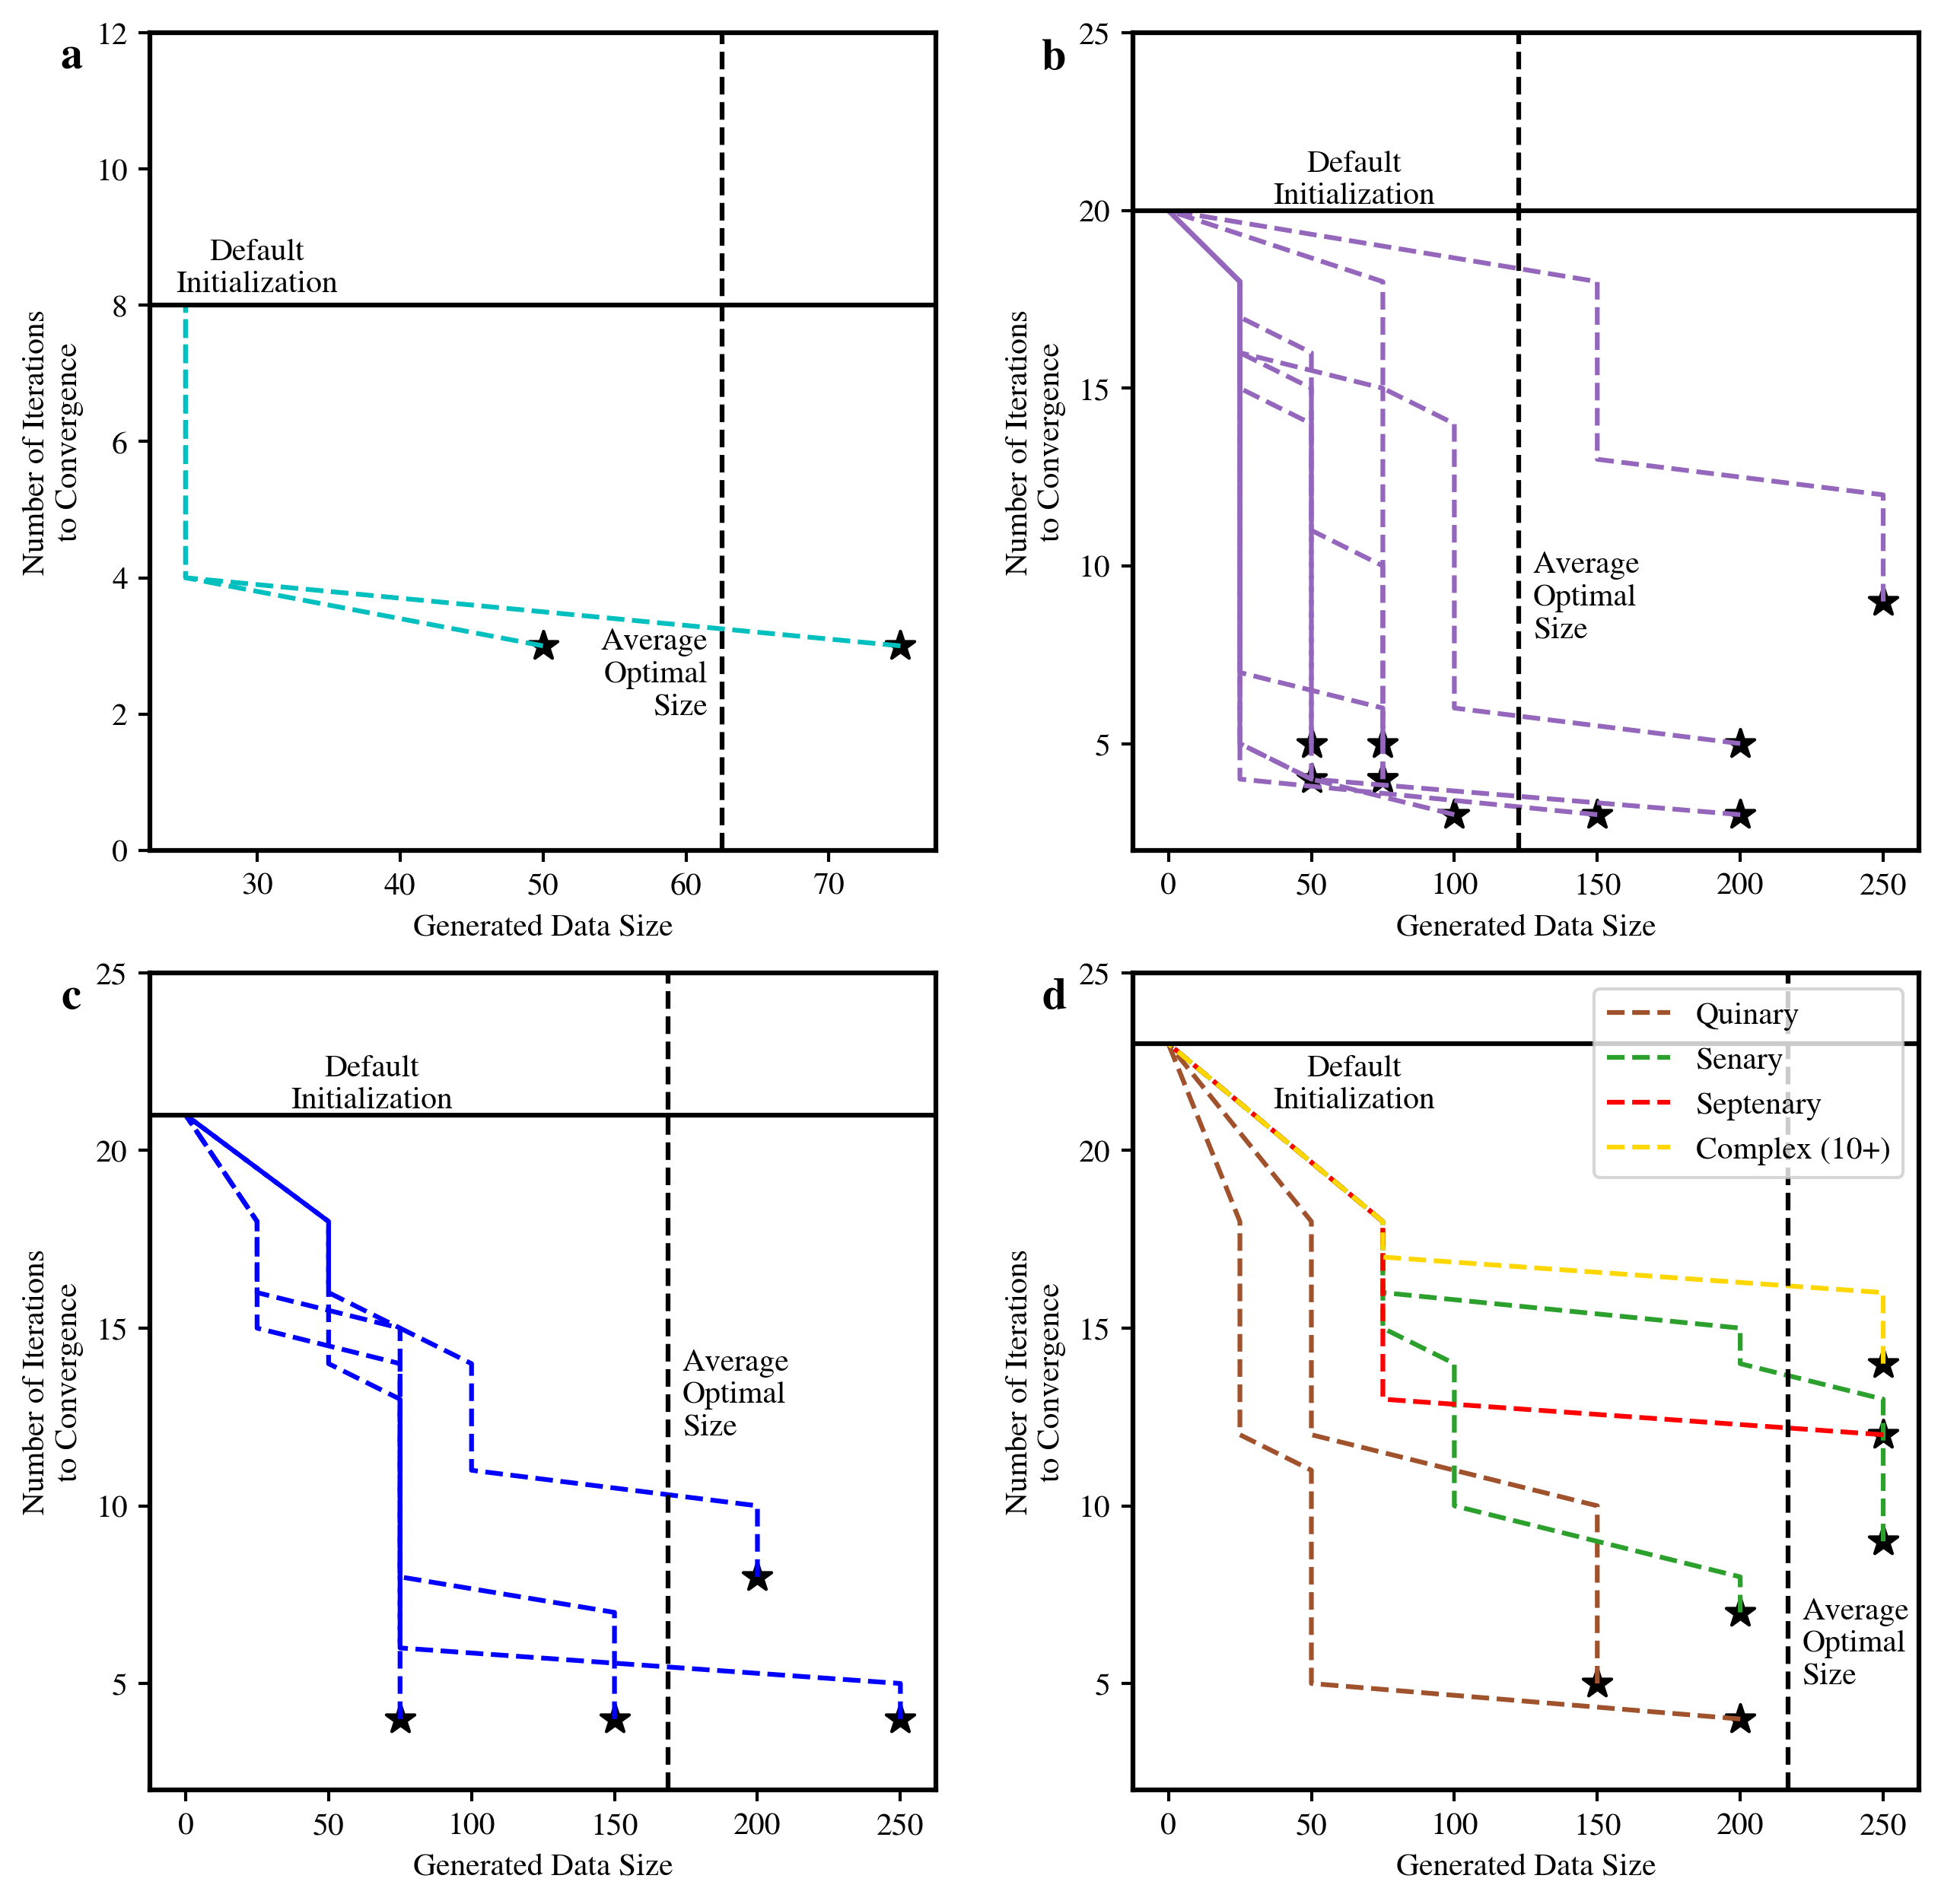

In [29]:
fig, ax = plt.subplots(2, 2, figsize = [10, 10])
colors = {2:'c', 3:'tab:purple', 4:'b', 5:'sienna', 6:'tab:green', 7:'red', 11:'gold'}
labels = {2:'Binary', 3:'Tertiary', 4:'Quaternary', 5:'Quinary', 6:'Senary', 7:'Septenary', 11:'Complex (10+)'}

plt.subplots_adjust(wspace = 0.25, hspace = 0.15)
Bavg= []
Tavg = []
Qavg = []
Cavg = []
for ind, row in df.iterrows():
    y, Tc, Pc, w, C, R, Vc, k, mxNames = me.LookUpMix(int(float(ind)), DS, EOS, 0)
    if C == 2:
        ax[0,0].plot(row.values[0:7], row.index[0:7].values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax[0,0].scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
        Bavg.append(row[row.first_valid_index()])
    elif C == 3:
        a = pd.Series([0], index = [20])
        row = pd.concat([row, a])
        ax[0,1].plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax[0,1].scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
        Tavg.append(row[row.first_valid_index()])
    elif C == 4:
        a = pd.Series([0], index = [21])
        row = pd.concat([row, a])
        ax[1,0].plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax[1,0].scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
        Qavg.append(row[row.first_valid_index()])
    else:
        a = pd.Series([0], index = [23])
        row = pd.concat([row, a])
        ax[1,1].plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax[1,1].scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
        Cavg.append(row[row.first_valid_index()])


handles, labels = ax[1,1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[1,1].legend(by_label.values(), by_label.keys(), loc = 'upper right')

ax[0,0].set_ylabel('Number of Iterations\nto Convergence')
ax[1,0].set_ylabel('Number of Iterations\nto Convergence')
ax[0,1].set_ylabel('Number of Iterations\nto Convergence')
ax[1,1].set_ylabel('Number of Iterations\nto Convergence')
ax[1,0].set_xlabel('Generated Data Size')
ax[1,1].set_xlabel('Generated Data Size')
ax[0,0].set_xlabel('Generated Data Size')
ax[0,1].set_xlabel('Generated Data Size')

ax[0,0].axhline(y=8, c= 'k')
ax[0,0].annotate('Default\nInitialization', xy = (30, 8.2), ha = 'center')
ax[0,1].axhline(y=20, c= 'k')
ax[0,1].annotate('Default\nInitialization', xy = (65, 20.2), ha = 'center')
ax[1,0].axhline(y=21, c= 'k')
ax[1,0].annotate('Default\nInitialization', xy = (65, 21.2), ha = 'center')
ax[1,1].axhline(y=23, c= 'k')
ax[1,1].annotate('Default\nInitialization', xy = (65, 21.2), ha = 'center')


ax[0,0].axvline(x=np.mean(Bavg), c= 'k', linestyle='--')
ax[0,0].annotate('Average\nOptimal\nSize', xy = (np.mean(Bavg)-1, 2), ha = 'right')
ax[0,1].axvline(x=np.mean(Tavg), c= 'k', linestyle='--')
ax[0,1].annotate('Average\nOptimal\nSize', xy = (np.mean(Tavg)+5, 8), ha = 'left')
ax[1,0].axvline(x=np.mean(Qavg), c= 'k', linestyle='--')
ax[1,0].annotate('Average\nOptimal\nSize', xy = (np.mean(Qavg)+5, 12), ha = 'left')
ax[1,1].axvline(x=np.mean(Cavg), c= 'k', linestyle='--')
ax[1,1].annotate('Average\nOptimal\nSize', xy = (np.mean(Cavg)+5, 5), ha = 'left')



ax[0,0].set_ylim([0, 12])
ax[0,1].set_ylim([2, 25])
ax[1,0].set_ylim([2, 25])
ax[1,1].set_ylim([2, 25])


ax[0,0].annotate('a', xy = (17, 11.5), ha = 'center', size= 14, weight = 'bold', annotation_clip = False)
ax[0,1].annotate('b', xy = (-40, 24), ha = 'center', size= 14, weight = 'bold', annotation_clip = False)
ax[1,0].annotate('c', xy = (-40, 24), ha = 'center', size= 14, weight = 'bold', annotation_clip = False)
ax[1,1].annotate('d', xy = (-40, 24), ha = 'center', size= 14, weight = 'bold', annotation_clip = False)

In [ ]:
colors = {2:'c', 3:'tab:purple', 4:'b', 5:'darkgoldenrod', 6:'tab:orange', 7:'red', 11:'maroon'}
labels = {2:'Binary', 3:'Tertiary', 4:'Quaternary', 5:'Quinary', 6:'Senary', 7:'Septenary', 11:'Complex (10+)'}

ax = plt.gca()
for ind, row in df.iterrows():
    y, Tc, Pc, w, C, R, Vc, k, mxNames = me.LookUpMix(int(float(ind)), DS, EOS, 0)
    if C == 2:
        ax.plot(row.values[0:7], row.index[0:7].values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax.scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
    elif C == 3:
        a = pd.Series([0], index = [20])
        row = pd.concat([row, a])
        ax.plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax.scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
    elif C == 4:
        a = pd.Series([0], index = [21])
        row = pd.concat([row, a])
        ax.plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax.scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)
    else:
        a = pd.Series([0], index = [23])
        row = pd.concat([row, a])
        ax.plot(row.values, row.index.values.astype(float), c = colors[C], label = labels[C], linestyle='--')
        ax.scatter(x =row[row.first_valid_index()] , y= float(row.first_valid_index()), marker='*', c = 'k', s= plt.rcParams['lines.markersize'] ** 2.5)

ax.set_ylabel('Number of Iterations\nto Convergence')
ax.set_xlabel('Generated Data Size')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())